# Calculate optimal 2 by 2 with 30 degree angles

In [1]:
import os
import sys
sys.path.append('../../..')

import numpy as np
from metabatt.utils import get_input_count, calculate_beam_lengths
from metabatt.graph import Graph, Edge, Subgraphs
from metabatt.reinforce.environments import MetabattEnvSubgraphs, MetabattEnvSubgraphsDumbVersion
from metabatt.reinforce.agents import QAgentReplayMemory

In [2]:
cell_size = [2, 2]
original_angles = [0, 75, 150, 180]
lengths, angles = calculate_beam_lengths(cell_size, original_angles)
# lengths, angles = [1.0], [0, 30, 90, 150, 180]
print(lengths, angles)


[0.25, 1.0, 1.0307764064044151, 1.118033988749895] [0, 63.43494882292201, 75.96375653207352, 104.03624346792648, 116.56505117707799, 180]


In [3]:
def do_training(lengths, angles, allow_frustrations = False):
    n_inputs = get_input_count(angles)
    # we start from scratch here
    subgraphs = Subgraphs(angles=angles,
                          lengths=lengths)

    # create the environment
    env = MetabattEnvSubgraphs(n_cells_x=3,
                               n_cells_y=3,
                               subgraphs=subgraphs,
                               allow_frustrations=allow_frustrations)

    
    NUM_EPISODES = 500 #15 #500  # this is very little, trained agent uses 500
    # create an agent and set hyperparameters
    agent = QAgentReplayMemory(env=env,
                          n_inputs=n_inputs, # this is the state representation
                          n_outputs=env.action_space.n,
                          max_epsilon=1.0,
                          min_epsilon=0.05,
                          gamma=0.99,  # discounted reward
                          tau=0.01, # target network update rate
                          batch_size=8,#8,  # Experience replay, trained agent uses 64
                          lambda_=-np.log(0.01)/NUM_EPISODES,  # decay for epsilon-greedy
                          replay_memory_capacity=16,#16,  # trained agent uses 1000
                          learning_rate=0.0005,
                          prefill_memory=True,
                          random_actions=False,  # random agent
                          save_best_graph=False)  # save the highest ranking graph state

    # train the agent
    agent.train(num_episodes=NUM_EPISODES)  # also plots results when finished
    
    
 


prefill replay memory
start training
 new max record arrange grid:  4.33


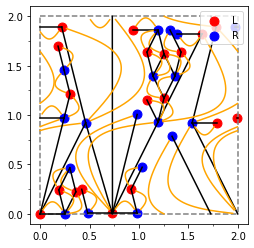

 new max record arrange grid:  4.4225


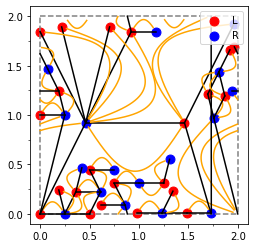

 new max record arrange grid:  4.775


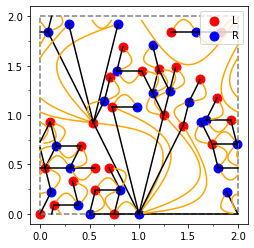

 new max record arrange grid:  4.99


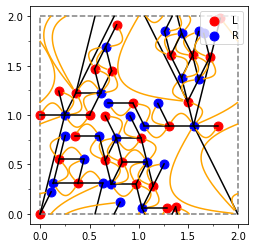

   10 mean training reward:  4.03
   20 mean training reward:  4.27


In [ ]:
deg_15_inc = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150, 165, 180]

# Angles, adjust, allow_frustration
experiments_to_run = [[deg_15_inc, False, False], 
                      [deg_15_inc, False, True], 
                      [deg_15_inc, True, False], 
                      [deg_15_inc, True, True]]

# Loop that runs the experiments
for experiment_data in experiments_to_run:
    original_angles, adjust, allow_frustration = experiment_data
    
    if adjust:
        lengths, angles = calculate_beam_lengths(cell_size, original_angles)
    else:
        lengths = [1]
        angles = original_angles
        
    do_training(lengths, angles, allow_frustration)